In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import librosa
X=[4.8478,3.7654,2.2346,1.1522,1.1522,2.2346,3.7654,4.8478]
Y=[4.5154,5.5978,5.5978,4.5154,2.9846,1.9022,1.9022,2.9846]

Mx=[3.2121,3.0,2.7878,2.7,2.7878,3.0,3.2121,3.3]
My=[3.96,4.05,3.96,3.75,3.53,3.45,3.53,3.75]

[-1.        +2.05777801e-14j -0.99995636+9.34229030e-03j
 -0.99982544+1.86837652e-02j ... -0.99960726-2.80236094e-02j
 -0.99982544-1.86837652e-02j -0.99995636-9.34229030e-03j]


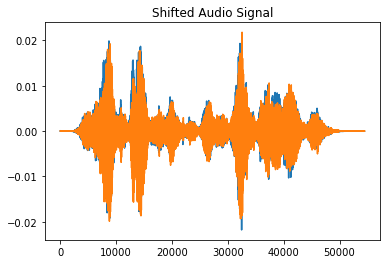

0.3273340204016884 1.0
0.6552267294011048


Text(0.5, 1.0, 'Attenuated Audio Signal')

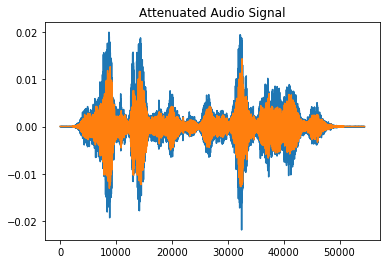

In [3]:
fs = 16000
D = math.sqrt(np.power(X[0]-Mx[0],2)+np.power(Y[0]-My[0],2))
t = D/340
tDelayInSamples = math.floor(fs*t)
path = "/Users/noelalben/Downloads/test.wav"
y,fs = librosa.load(path, sr=16000)
aud=y
fftData = np.fft.fft(y)

N = fftData.shape[0]
k = np.linspace(0, N-1, N)
timeDelayPhaseShift = np.exp(((-2*np.pi*1j*k*tDelayInSamples)/(N))+(tDelayInSamples*np.pi*1j))

print(timeDelayPhaseShift)
#timeDelayPhaseShift = np.fft.fftshift(timeDelayPhaseShift)
#print(timeDelayPhaseShift)

#timeDelayPhaseShift = np.fft.fftshift(timeDelayPhaseShift)

fftWithDelay = np.multiply(fftData, timeDelayPhaseShift)


shiftedWaveform = np.fft.ifft(fftWithDelay)




plots = 1
plt.figure()
plt.plot(y)
plt.plot(shiftedWaveform)
plt.title("Shifted Audio Signal")
plt.show()

def sim_microphone(x, y, z,angle):
    alpha = 0.25
    theta = np.cos(z/(math.sqrt(np.power(x,2)+np.power(y,2))))
    phi = math.atan2(y,x)
    print(phi,theta)
    strength = np.sin(np.pi/2*angle)*np.sin(theta)*np.cos(angle-phi)+np.cos(np.pi/2*angle)*np.cos(theta)
    strength = alpha + (1-alpha )*strength
    print(strength)
    return strength
x = abs(X[0]-Mx[0])
y = (Y[0]-My[0])
stro = sim_microphone(x,y, 0,0)
plt.plot(aud)
plt.plot(stro*shiftedWaveform)
plt.title("Attenuated Audio Signal")